In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

!pip install datasets # Install the datasets library
from datasets import load_dataset
dataset = load_dataset('h1alexbel/sr-numerical')
# Convert the Hugging Face dataset to a Pandas DataFrame
data = dataset['train'].to_pandas() # Access the 'train' split and convert to DataFrame

# Inspect the data to identify categorical and numeric columns
print(data.info())

# Step 2: Define Features and Target
# Replace 'target_column' with the actual name of your target column
X = data.drop(columns=['contributors'])
y = data['contributors']

# --- Remove infrequent classes ---
# Get value counts for the target variable
value_counts = y.value_counts()

# Filter out classes with only one sample
frequent_classes = value_counts[value_counts > 1].index

# Filter the dataset to include only frequent classes
data = data[y.isin(frequent_classes)]

# Redefine X and y after filtering
X = data.drop(columns=['contributors'])
y = data['contributors']
# --- End of removing infrequent classes ---


# Step 3: Handle Categorical and Numeric Features
# Automatically detect numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 4: Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply Preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 7: KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessed/numerical.csv:   0%|          | 0.00/189k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4456 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456 entries, 0 to 4455
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   repo          4456 non-null   object
 1   releases      4456 non-null   int64 
 2   contributors  4456 non-null   int64 
 3   pulls         4456 non-null   int64 
 4   commits       4456 non-null   int64 
 5   issues        4456 non-null   int64 
 6   branches      4456 non-null   int64 
 7   workflows     4456 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 278.6+ KB
None
Accuracy: 9.05%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


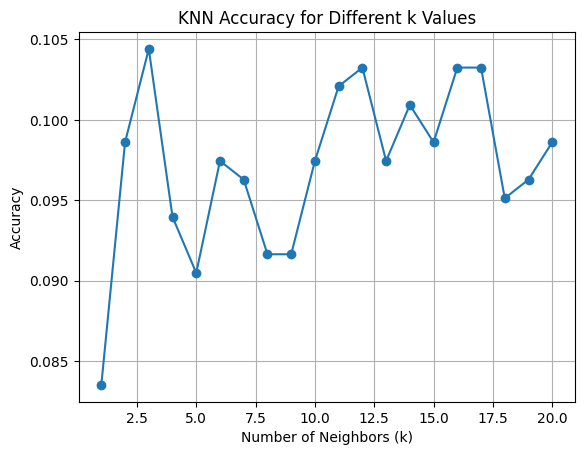

In [ ]:
# Step 9: Optimize k by testing multiple values
import matplotlib.pyplot as plt # Import the pyplot module

accuracies = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid()
plt.show()